In [1]:
import os
import pandas as pd
import numpy as np

from PIL import Image

In [2]:
DATA_FOLDER = '../leaf/data/femnist/data/raw_data/by_write'
DATA_STATS_FILE = 'data_stats.csv'

In [3]:
dataset_stats = pd.DataFrame()

for user_group in os.listdir(DATA_FOLDER):
    user_group_path = f'{DATA_FOLDER}/{user_group}'
    
    for user in os.listdir(user_group_path):
        user_path = f'{user_group_path}/{user}'
        
        
        digits_count = np.nan
        char_count = np.nan
        lowercase_count = np.nan
        uppercase_count = np.nan
        
        for user_class in os.listdir(user_path):
            user_class_path = f'{user_path}/{user_class}'
            
            if user_class.startswith('l'):
                lowercase_count = len(os.listdir(user_class_path))
            elif user_class.startswith('u'):
                uppercase_count = len(os.listdir(user_class_path))
            elif user_class.startswith('c'):
                char_count = len(os.listdir(user_class_path))
            elif user_class.startswith('d'):
                digits_count = len(os.listdir(user_class_path))
        
        row = {'user':user,
               'user_group':user_group,
               'characters':char_count,
               'lowercase':lowercase_count,
               'uppercase':uppercase_count,
               'digits':digits_count}
        
        dataset_stats = dataset_stats.append(row, ignore_index=True)
        
dataset_stats.to_csv(DATA_STATS_FILE)

In [4]:
dataset_stats

,characters,digits,lowercase,uppercase,user,user_group
0,NaN,116.0,24.0,26.0,f2328_92,hsf_4
1,NaN,130.0,22.0,24.0,f2322_80,hsf_4
2,NaN,103.0,25.0,26.0,f2472_83,hsf_4
3,NaN,104.0,20.0,26.0,f2480_61,hsf_4
4,NaN,111.0,23.0,21.0,f2134_58,hsf_4
...,...,...,...,...,...,...
3592,151.0,111.0,24.0,24.0,f0427_40,hsf_0
3593,159.0,104.0,25.0,18.0,f0288_48,hsf_0
3594,199.0,106.0,25.0,20.0,f0178_39,hsf_0
3595,218.0,115.0,25.0,24.0,f0092_16,hsf_0


In [5]:
print(f'Groups count: {len(dataset_stats.user_group.unique())}')
print(f'Users count: {len(dataset_stats.user)}')

digits_count = dataset_stats.digits.sum()
lcase_count = dataset_stats.lowercase.sum()
ucase_count = dataset_stats.uppercase.sum()
chars_count = dataset_stats.characters.sum()

print(f'Total digits count: {digits_count}')
print(f'Total lowercase characters count: {lcase_count}')
print(f'Total uppercase characters count: {ucase_count}')
print(f'Total characters count: {chars_count}')
print(f'Total samples count: {digits_count + lcase_count + ucase_count + chars_count}')

Groups count: 7
Users count: 3597
Total digits count: 402953.0
Total lowercase characters count: 81096.0
Total uppercase characters count: 81463.0
Total characters count: 248743.0
Total samples count: 814255.0


In [6]:
def get_class_path(user:str, _class:str) -> str:
    
    if _class not in ['d', 'c', 'l', 'u']:
        raise ValueError('class should be d for digits, c for characters, l for lowercase or u for uppercase')
    
    row = dataset_stats[dataset_stats.user == user].iloc[0]
    class_dir = row.user.replace('f',_class)
    return f'{DATA_FOLDER}/{row.user_group}/{row.user}/{class_dir}'

def get_images_path(user:str, _class:str) -> list:
    path = get_class_path(user, _class)
    
    if os.path.exists(path):
        images_path = [] 
        
        for image in os.listdir(path):
            images_path.append(f'{path}/{image}')
    else:
        raise ValueError('Path does not exist or samples count is 0')
        
    return images_path

/home/maan/BA/code/.ba/lib64/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  if __name__ == '__main__':


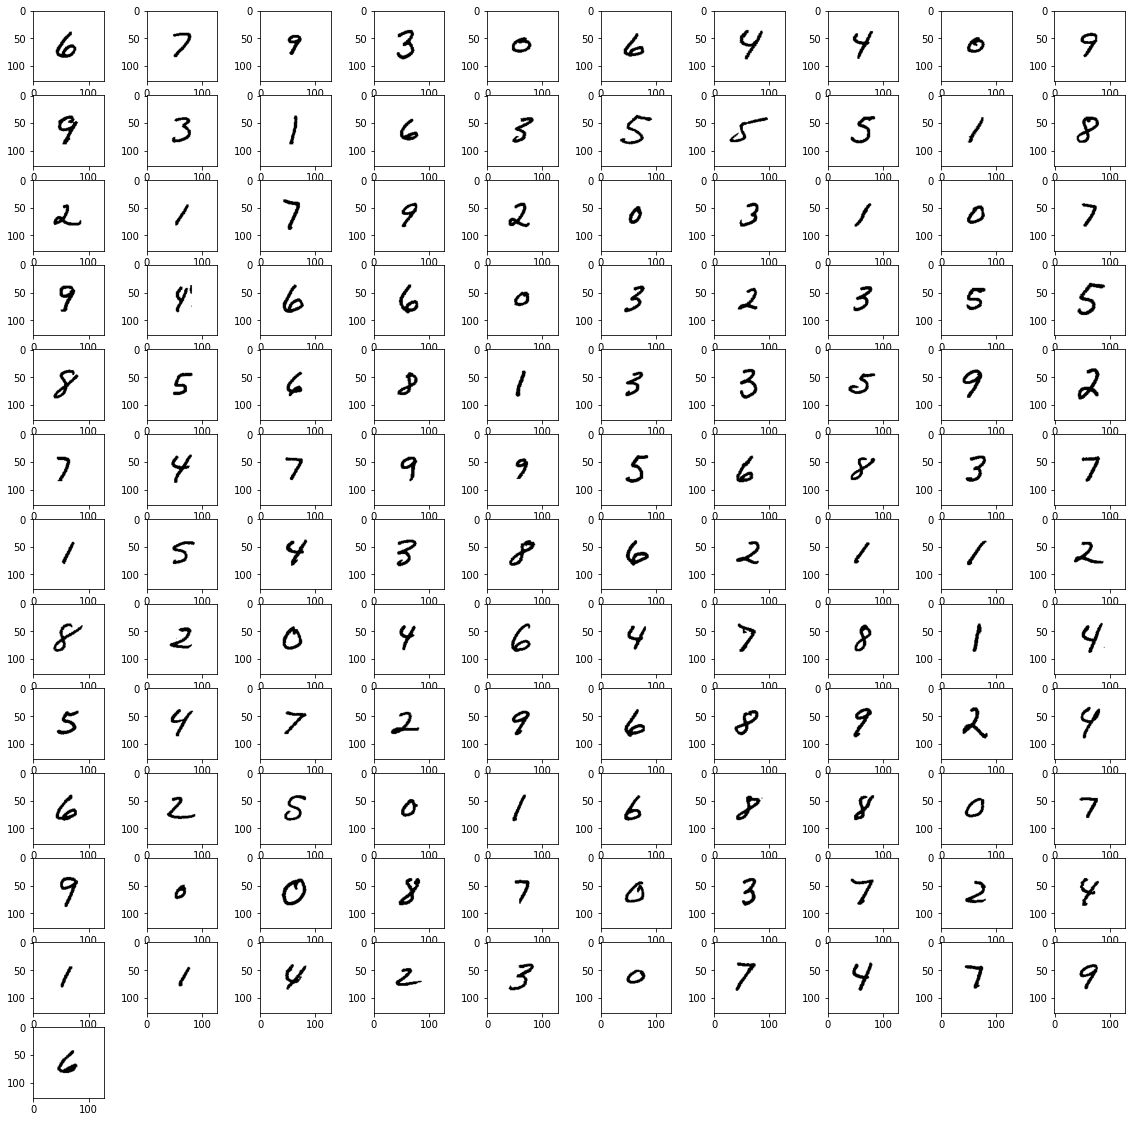

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

images = get_images_path(user='f0473_21', _class='d')

plt.figure(figsize=(20,20))
columns = 10
for i, img_path in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    image = mpimg.imread(img_path)
    plt.imshow(image)